In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
mainDF = pd.read_excel("AutoInsurSweden.xlsx")
mainDF.head()

,X,Y
0,108,"392,5"
1,19,"46,2"
2,13,"15,7"
3,124,"422,2"
4,40,"119,4"


In [4]:
mainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       63 non-null     int64 
 1   Y       63 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [13]:
mainDF.Y = mainDF.Y.str.replace(",",".")
mainDF.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [23]:
mainDF.Y = mainDF.Y.astype("float")

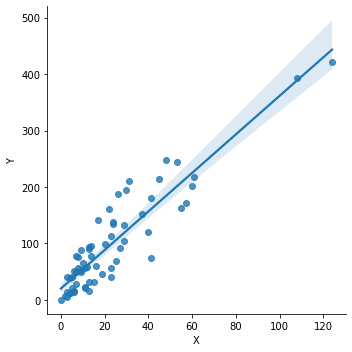

In [69]:
sns.lmplot(x="X", y="Y", data=mainDF)

In [24]:
x = mainDF.X 
y = mainDF.Y

In [25]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x,y,train_size=0.8, random_state=42)

<AxesSubplot:xlabel='X', ylabel='Y'>

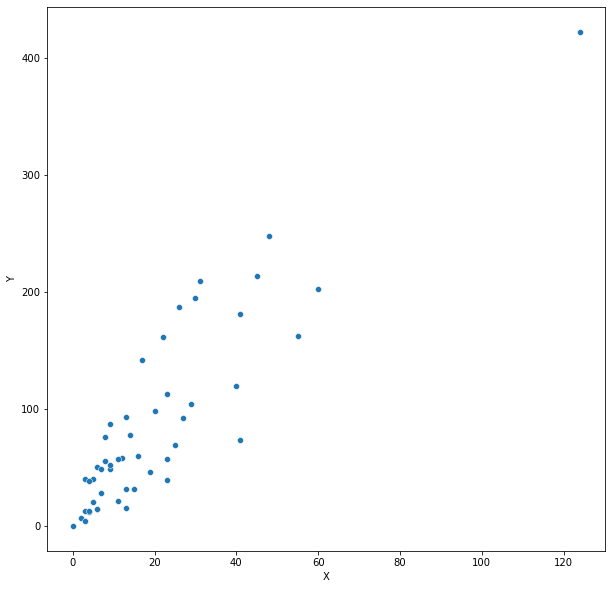

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = trainX, y=trainY)

In [27]:
from sklearn.linear_model import LinearRegression
LM = LinearRegression()

In [40]:
trainX_arr = np.array(trainX).reshape(-1,1)
testX_arr = np.array(testX).reshape(-1,1)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

LM.fit(trainX_arr, trainY)
predict = LM.predict(testX_arr)
print("MAE: ", mean_absolute_error(predict,testY))
print("RMSE: ", mean_squared_error(predict,testY))

MAE:  26.414909339960467
RMSE:  875.0434234424167


In [50]:
print("Coeff: ", LM.coef_, "Intercept: ", LM.intercept_)

Coeff:  [3.42923429] Intercept:  16.75023759857541


<AxesSubplot:xlabel='X', ylabel='Y'>

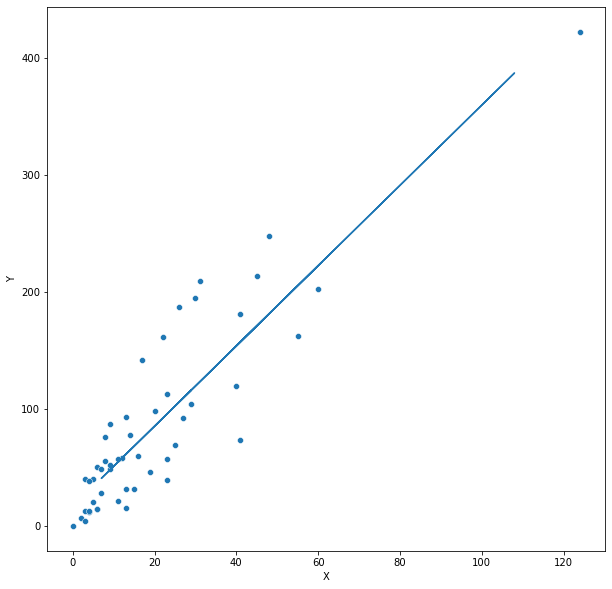

In [72]:
ax , fig = plt.subplots(figsize=(10,10))
plt.plot(testX,predict)
sns.scatterplot(x=trainX, y=trainY)


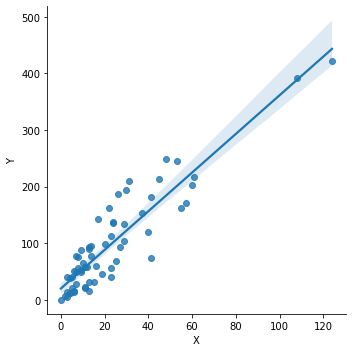

In [74]:
sns.lmplot(x="X", y="Y", data=mainDF)